## Data access code for locations used in all ICESat-2 Hackweek tutorials
This notebook provides parameters and visualizations for locations and datasets used in ICESat-2 Hackweek 2020 tutorials. This notebook provides the `icepyx` code needed to download the data required for the given tutorial.
#### Credits
* notebook by: Jessica Scheick

### Locations and Relevant Tutorials
* Byrd Glacier/Ross Ice Shelf --> not using?
* *Arctic Ocean (covering the north pole)* - sea ice products --> Get specific parameters
* *Northwest Continental US (Washington state area)* - geospatial analysis --> get specific parameters
* *Pine Island Glacier (PIG)* - Land ice products, data filtering

They include datasets: ATL03, ATL0...

### Import packages, including icepyx

In [1]:
from icepyx import icesat2data as ipd
import os
import shutil
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

## Byrd Glacier/Ross Ice Shelf
* fast flowing ice, land ice, floating ice, blowing snow
* datasets: ATL03, ATL06, ATL09


#### Download this data:
```region_a = ipd.Icesat2Data('ATL06', [148, -81, 162, -80], ['2018-10-14','2018-12-22'])
region_a.earthdata_login('your_earthdata_uid', 'your_email')
region_a.download_granules('/home/jovyan/data')```

In [5]:
short_name = 'ATL06'
spatial_extent = [148, -81, 162, -80]
date_range = ['2018-10-14','2018-12-22']

In [6]:
region_a = ipd.Icesat2Data(short_name, spatial_extent, date_range)

/home/jovyan/icepyx/icepyx/core/icesat2data.py:117: UserWarning: Please note: as of 2020-05-05, a major reorganization of the core icepyx code may result in errors produced by now depricated functions. Please see our documentation pages or example notebooks for updates.
  warnings.warn("Please note: as of 2020-05-05, a major reorganization of the core icepyx code may result in errors produced by now depricated functions. Please see our documentation pages or example notebooks for updates.")


ATL06
['2018-10-14', '2018-12-22']
00:00:00
23:59:59
003
['bounding box', [148, -81, 162, -80]]


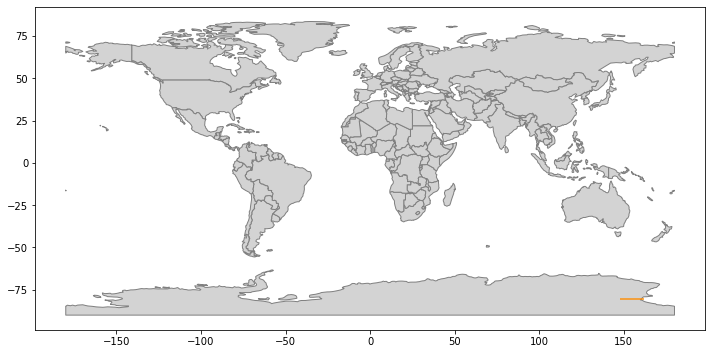

In [7]:
print(region_a.dataset)
print(region_a.dates)
print(region_a.start_time)
print(region_a.end_time)
print(region_a.dataset_version)
print(region_a.spatial_extent)
region_a.visualize_spatial_extent()

In [8]:
region_a.avail_granules()

{'Number of available granules': 91,
 'Average size of granules (MB)': 102.51569275279671,
 'Total size of all granules (MB)': 9328.9280405045}

## Arctic Ocean
* sea ice (first and multiyear), leads
* datasets: ATL07, ATL09, ATL10, ATL12


#### Download this data:
```region_a = ipd.Icesat2Data('ATL07', [0, 80, 180, 90], ['2019-02-01','2019-03-01'])
region_a.earthdata_login('your_earthdata_uid', 'your_email')
region_a.download_granules('/home/jovyan/data')```

In [10]:
short_name = 'ATL07'
spatial_extent = [0, 80, 180, 90]
date_range = ['2019-02-01','2019-03-01']

In [11]:
region_a = ipd.Icesat2Data(short_name, spatial_extent, date_range)

/home/jovyan/icepyx/icepyx/core/icesat2data.py:117: UserWarning: Please note: as of 2020-05-05, a major reorganization of the core icepyx code may result in errors produced by now depricated functions. Please see our documentation pages or example notebooks for updates.
  warnings.warn("Please note: as of 2020-05-05, a major reorganization of the core icepyx code may result in errors produced by now depricated functions. Please see our documentation pages or example notebooks for updates.")


ATL07
['2019-02-01', '2019-03-01']
00:00:00
23:59:59
002
['bounding box', [0, 80, 180, 90]]


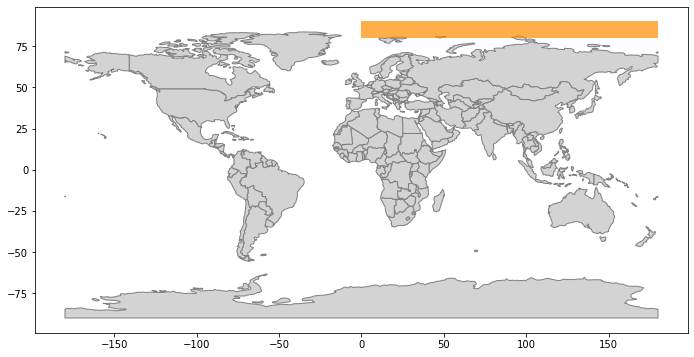

In [12]:
print(region_a.dataset)
print(region_a.dates)
print(region_a.start_time)
print(region_a.end_time)
print(region_a.dataset_version)
print(region_a.spatial_extent)
region_a.visualize_spatial_extent()

In [13]:
region_a.avail_granules()

{'Number of available granules': 676,
 'Average size of granules (MB)': 185.5708055072991,
 'Total size of all granules (MB)': 125445.86452293428}

## Northwest Continental US
* snow, mid-latitude glaciers, steep topography
* datasets: ATL06, ATL08, ATL13


#### Download this data:
```region_a = ipd.Icesat2Data('ATL06', [[-125, 40, -120, 50], ['2019-06-01','2019-07-01'])
region_a.earthdata_login('your_earthdata_uid', 'your_email')
region_a.download_granules('/home/jovyan/data')```

In [15]:
short_name = 'ATL06'
spatial_extent = [-125, 40, -120, 50]
date_range = ['2019-06-01','2019-07-01']

In [16]:
region_a = ipd.Icesat2Data(short_name, spatial_extent, date_range)

/home/jovyan/icepyx/icepyx/core/icesat2data.py:117: UserWarning: Please note: as of 2020-05-05, a major reorganization of the core icepyx code may result in errors produced by now depricated functions. Please see our documentation pages or example notebooks for updates.
  warnings.warn("Please note: as of 2020-05-05, a major reorganization of the core icepyx code may result in errors produced by now depricated functions. Please see our documentation pages or example notebooks for updates.")


ATL06
['2019-06-01', '2019-07-01']
00:00:00
23:59:59
003
['bounding box', [-125, 40, -120, 50]]


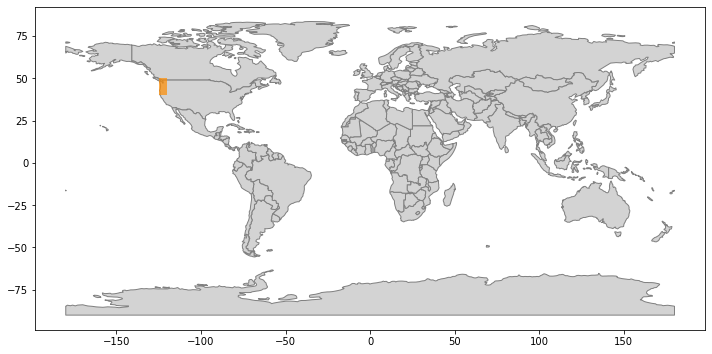

In [17]:
print(region_a.dataset)
print(region_a.dates)
print(region_a.start_time)
print(region_a.end_time)
print(region_a.dataset_version)
print(region_a.spatial_extent)
region_a.visualize_spatial_extent()

In [18]:
region_a.avail_granules()

{'Number of available granules': 15,
 'Average size of granules (MB)': 12.68004366558,
 'Total size of all granules (MB)': 190.2006549837}

## Pine Island Glacier
* fast flowing ice, land ice, floating ice, clouds, crevasses
* datasets: ATL06, plus two tracks of ATL03


In [2]:
email='your email here'
name='your earthdata login'

data_home='/home/jovyan/data'

if not os.path.isdir(data_home):
    os.mkdir(data_home)

# set DOWNLOAD to true if you're ready to download the data:
DOWNLOAD=False
    
requests=[
    {   'short_name' : 'ATL06',
        'spatial_extent' :[-102, -76, -98, -74.5],
        'date_range' : ['2018-10-14','2020-04-01']},
    {   'short_name' :'ATL03',
        'spatial_extent' :[-102, -76, -98, -74.5],
        'date_range' : ['2018-10-14','2020-04-01']},
    {   'short_name' :'ATL03',
        'spatial_extent' :[-102, -76, -98, -74.5],
        'date_range' : ['2019-12-28', '2019-12-29']}]

In [12]:
for req in requests:
    #### Download this data: (uncomment and run)
    region_a = ipd.Icesat2Data(req['short_name'], req['spatial_extent'], req['date_range'])
    if DOWNLOAD:
        region_a.earthdata_login(name, email)
        region_a.download_granules(data_home)
    print(region_a.dataset)
    print(region_a.dates)
    print(region_a.start_time)
    print(region_a.end_time)
    print(region_a.dataset_version)
    print(region_a.spatial_extent)
    region_a.visualize_spatial_extent()

ATL06
['2018-10-14', '2020-04-01']
00:00:00
23:59:59
003
['bounding box', [-102, -76, -98, -74.5]]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

ATL03
['2018-10-14', '2020-04-01']
00:00:00
23:59:59
003
['bounding box', [-102, -76, -98, -74.5]]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

ATL03
['2019-12-28', '2019-12-29']
00:00:00
23:59:59
003
['bounding box', [-102, -76, -98, -74.5]]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …